In [34]:
from drawdata import draw_scatter
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from rich.console import Console
import seaborn as sns


In [81]:
# Manually create a new dataset
draw_scatter()

<Axes: title={'center': 'X vs. Y'}, xlabel='x', ylabel='y'>

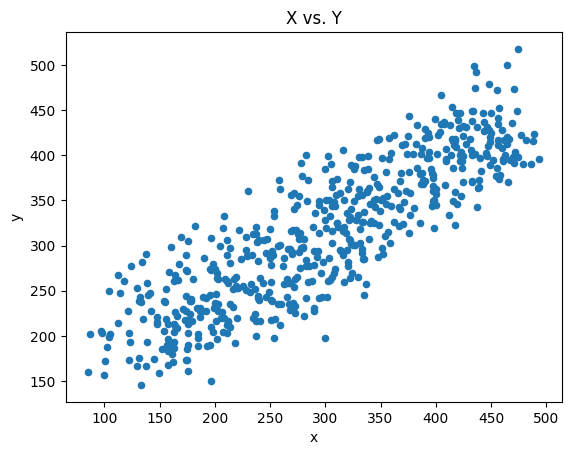

In [2]:
df = pd.read_csv("data.csv")
df.plot.scatter(x="x", y="y", title="X vs. Y")


Lets calculate the covariance matrix for this dataset. We are expecting that this data will have positive pearson coefficient due to the linear shape of the data.


In [25]:
X = df[["x", "y"]].to_numpy()
corr = np.corrcoef(X, rowvar=False)
cov = np.cov(X, rowvar=False)

console = Console()
corr = pd.DataFrame(corr, columns=["X","Y"], index=["X", "Y"])
cov = pd.DataFrame(cov, columns=["X","Y"], index=["X", "Y"])

console.print("Correlation")
console.print(corr)

console.print("Covariance")
console.print(cov)

Correlation

X         Y
X  1.000000  0.864595
Y  0.864595  1.000000

Covariance

X            Y
X  10405.879409  6948.205286
Y   6948.205286  6206.415918

As expected, we can see very large Person correlation coefficient between two variables because perason coefficient measures the linear association between variables. 

## Outlier detection

Layman definition of the outliers are the datapoints which are abnormal and does not fall in the normal data generating regime. More preciselly, outliers are rare event E which have a very low probability to happen. Mathematically speaking, they have a low probability density function $p(x)$. 
To classify the event as an outlier event we first need to define threshold parameter $\alpha$ which is a boundery probability which defines the concept of outliers. 
Outliers are than event which satisfy the formula $p(|x| > \alpha)$ 

In [20]:
def points_inside_radius(df, x, y, radius):
    distances = (df["x"] - x)**2 + (df["y"] - y)**2
    distances = distances.apply(np.sqrt)
    mask = distances < radius
    inside_radius = df[mask]
    return inside_radius

x=300
y=300
r=10
inside_radius = points_inside_radius(df, x, y, r)
p = inside_radius.iloc[0]

Text(232.94304686196386, 424.2999223661502, 'X2')

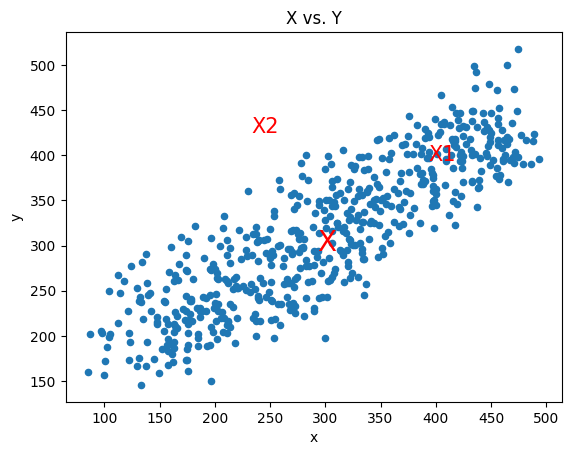

In [22]:
_, ax = plt.subplots()
ax = df.plot.scatter(x="x", y="y", title="X vs. Y", ax=ax)

plt.annotate('X', 
             xy=(p["x"], p["y"]),
             color="red", 
             fontsize=20)

plt.annotate('X1', 
             xy=(p["x"]+100, p["y"]+100),
             color="red", 
             fontsize=15)


plt.annotate('X2', 
             xy=(p["x"]-60, p["y"]+130),
             color="red", 
             fontsize=15)


Upper picture shows us the X1 and X2 points which are approximatelly equally distanced from the centre  X point. But the main difference between these two points is that one of them lays in the region which is not dense with data and thus it appears to the human eye that this point is outlier. We could check this fact by estimating the probability density function for this dataset and calculating the probability $p(x2)$ and checking that this probability is smaller then $\alpha$ .

## Density estimation

### Kernel Density Estimation - KDE
KDE has two parameters:
* Smoothing Parameter
* Basis Function (kernel)

In [ ]:
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
log_probs = kde.score_samples(X)
probs = np.exp(log_probs)
probs

In [46]:
X

array([[455.04318963, 472.47183154],
       [474.2436775 , 517.60650376],
       [434.36228726, 498.82291495],
       ...,
       [178.34627528, 238.51526429],
       [289.97749797, 278.19948142],
       [199.81588604, 236.66145235]])

<Axes: >

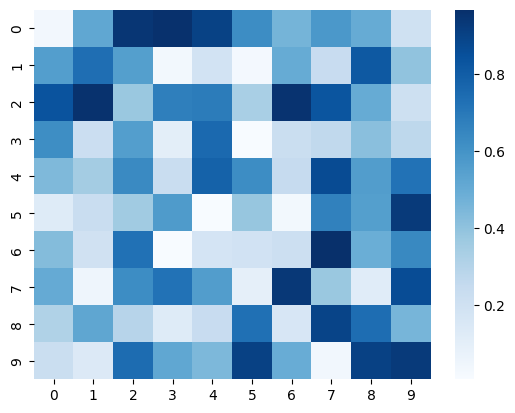

In [38]:
data = np.random.rand(10, 10)

sns.heatmap(df, cmap='Blues')

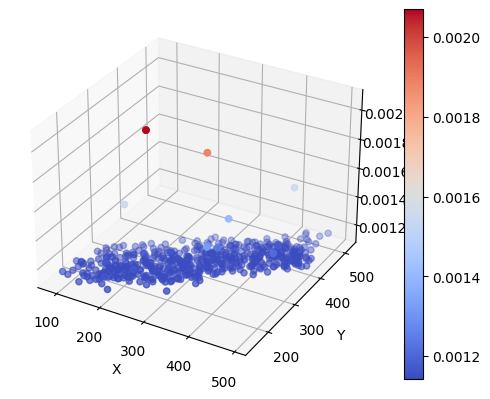

In [31]:
x = X[:,0]
y = X[:,1]
z = probs

fig = plt.figure()
ax = plt.axes(projection='3d')

sc = ax.scatter3D(x, y, z, c=z, cmap='coolwarm')
cb = fig.colorbar(sc)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# show the plot
plt.show()

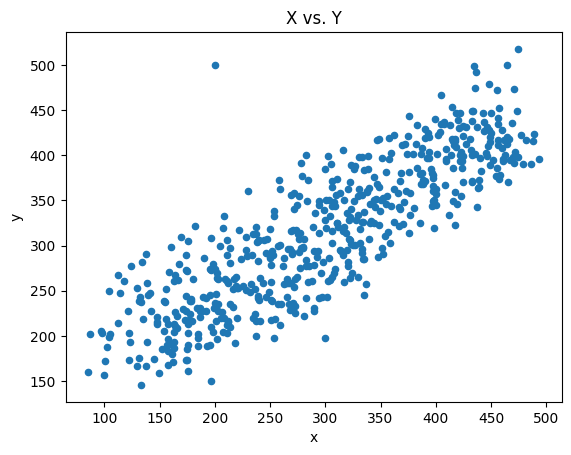

In [67]:
df2 = pd.read_csv("outlier.csv")
df2.plot.scatter(x="x", y="y", title="X vs. Y")
X2 = df2.to_numpy()[:,0:2]
outlier = X2[0]
X2 = X2[1:, :]

In [80]:

kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X2)
log_probs = kde.score_samples([outlier])
probs = np.exp(log_probs)
probs

array([0.])

# Outliers in timeseries

In [98]:
data = [{"x":2.860667572286612,"y":256.97529009740845,"color":"a"},{"x":45.48078269386328,"y":305.79942860757615,"color":"a"},{"x":16.13535186793633,"y":277.1988357437626,"color":"a"},{"x":19.436706263196278,"y":275.28546514019877,"color":"a"},{"x":-8.14324078948048,"y":285.91704285551407,"color":"a"},{"x":30.317688885548364,"y":263.9630016998361,"color":"a"},{"x":38.05966969311266,"y":275.7699331263234,"color":"a"},{"x":19.885420891258736,"y":302.1368702534282,"color":"a"},{"x":1.1646964623169325,"y":262.12949587478295,"color":"a"},{"x":108.370270050612,"y":307.486638534088,"color":"a"},{"x":46.987705940687384,"y":276.95926610215537,"color":"a"},{"x":81.94855847065753,"y":294.41939513296876,"color":"a"},{"x":49.66118745848059,"y":250.6432393646207,"color":"a"},{"x":2.401122208273925,"y":274.2617623275903,"color":"a"},{"x":90.6845369014558,"y":281.8016816167665,"color":"a"},{"x":85.05195432527748,"y":249.8845586996443,"color":"a"},{"x":86.18524983710162,"y":307.2715971401971,"color":"a"},{"x":30.132314433935356,"y":249.1694260614808,"color":"a"},{"x":120.91036496005748,"y":252.82819351748327,"color":"a"},{"x":145.86478361212858,"y":260.2729594828588,"color":"a"},{"x":113.78492917449908,"y":213.8220482162747,"color":"a"},{"x":84.83833622546423,"y":277.9983634441745,"color":"a"},{"x":143.71001192248025,"y":234.82584858359314,"color":"a"},{"x":98.48468672813542,"y":222.1404638252955,"color":"a"},{"x":177.65740156827655,"y":252.19790262238357,"color":"a"},{"x":100.03593538047282,"y":237.15294651303657,"color":"a"},{"x":161.5891927020642,"y":234.96404074215167,"color":"a"},{"x":143.7071849859927,"y":243.90373581683554,"color":"a"},{"x":165.1001285720874,"y":301.73426064160725,"color":"a"},{"x":199.04355862958192,"y":251.97478817289664,"color":"a"},{"x":180.50703413052244,"y":252.10082707358112,"color":"a"},{"x":167.7067315405063,"y":262.7372356624162,"color":"a"},{"x":143.4554416551844,"y":264.4066570323704,"color":"a"},{"x":226.0827773058499,"y":224.49346547717755,"color":"a"},{"x":173.1847319039994,"y":257.10443401776683,"color":"a"},{"x":223.2363494267786,"y":221.1021780986976,"color":"a"},{"x":254.57854915480107,"y":253.73272556982064,"color":"a"},{"x":277.1508293787736,"y":231.5691566522828,"color":"a"},{"x":244.9239756167299,"y":222.19700274200125,"color":"a"},{"x":236.4569611136076,"y":270.9231923227144,"color":"a"},{"x":209.79057536235396,"y":274.6183041278962,"color":"a"},{"x":267.6397110111423,"y":251.8716376521361,"color":"a"},{"x":304.7474368509572,"y":235.52322493946883,"color":"a"},{"x":282.5039324945714,"y":215.5096707632831,"color":"a"},{"x":266.29894347530103,"y":265.2687351653018,"color":"a"},{"x":343.2610455397612,"y":234.7800728292499,"color":"a"},{"x":331.26493311261754,"y":238.3240438026429,"color":"a"},{"x":381.6860465763793,"y":241.09165091815902,"color":"a"},{"x":329.3463862725617,"y":259.1557329125611,"color":"a"},{"x":340.7604724442542,"y":235.89657467028337,"color":"a"},{"x":341.37632509385446,"y":257.6387222882154,"color":"a"},{"x":342.9818594571642,"y":260.8714604461338,"color":"a"},{"x":328.9325177082665,"y":260.75296840702333,"color":"a"},{"x":351.5559818217356,"y":244.02521310750473,"color":"a"},{"x":343.21808724355157,"y":286.4713672133724,"color":"a"},{"x":393.7956132914081,"y":275.99055837759306,"color":"a"},{"x":402.02413674867205,"y":253.6788751142837,"color":"a"},{"x":359.45445620608814,"y":264.34094476043987,"color":"a"},{"x":441.8888267419861,"y":215.0087957486062,"color":"a"},{"x":410.69592664631983,"y":255.59857154641668,"color":"a"},{"x":417.7929751023211,"y":254.8053078545264,"color":"a"},{"x":435.92747375445197,"y":248.61311345346016,"color":"a"},{"x":435.5163871103356,"y":287.3715129002788,"color":"a"},{"x":424.42012532002894,"y":266.29213221249876,"color":"a"},{"x":471.37115701672695,"y":272.59720937229673,"color":"a"},{"x":432.1898201378387,"y":240.70797803297495,"color":"a"},{"x":487.49425755373977,"y":236.02572918498652,"color":"a"},{"x":433.9611529430835,"y":245.19275815848607,"color":"a"},{"x":525.7034244696417,"y":293.4403129818229,"color":"a"},{"x":506.85337737123683,"y":233.18932446262096,"color":"a"},{"x":481.0180061484866,"y":246.075473814196,"color":"a"},{"x":530.375371661806,"y":283.6202775120733,"color":"a"},{"x":524.1252080887017,"y":280.08906491593575,"color":"a"},{"x":502.4944504079465,"y":249.76516343563097,"color":"a"},{"x":519.979036413881,"y":282.14362171526454,"color":"a"},{"x":574.9818914760871,"y":226.57337520573412,"color":"a"},{"x":546.7556133329596,"y":241.7029562973973,"color":"a"},{"x":560.6343996864497,"y":279.7613250429581,"color":"a"},{"x":612.2441688432077,"y":260.18458859485025,"color":"a"},{"x":562.8408583465323,"y":245.64889430083323,"color":"a"},{"x":591.8256354389189,"y":241.02290547671004,"color":"a"},{"x":596.1314057074462,"y":232.76175465981902,"color":"a"},{"x":618.7659442848308,"y":257.605150061907,"color":"a"},{"x":615.943271273452,"y":264.34000659641936,"color":"a"},{"x":585.8622271780165,"y":238.78046850003636,"color":"a"},{"x":595.2617381850423,"y":227.6093461157398,"color":"a"},{"x":650.7707675680049,"y":258.45757672708845,"color":"a"},{"x":626.1973595852813,"y":273.2434016738006,"color":"a"},{"x":594.9148714348571,"y":227.48463140271724,"color":"a"},{"x":656.641480112692,"y":313.0976792075056,"color":"a"},{"x":629.0978954020951,"y":254.59719499613166,"color":"a"},{"x":629.8201412835617,"y":264.5372310944006,"color":"a"},{"x":642.5550750926888,"y":239.73436718006695,"color":"a"},{"x":638.259902238078,"y":253.64073225693545,"color":"a"},{"x":663.3732511785471,"y":233.0183299869799,"color":"a"},{"x":618.9372941214561,"y":290.03570118533577,"color":"a"},{"x":650.7308540095329,"y":257.77228598204124,"color":"a"},{"x":658.8991117553732,"y":245.45673009697026,"color":"a"},{"x":661.7410731933519,"y":312.5903251225582,"color":"a"},{"x":336.4150611342408,"y":250.0446087053111,"color":"a"},{"x":363.6788245080442,"y":250.2009219502776,"color":"a"},{"x":429.15542664414363,"y":277.2898861990437,"color":"a"},{"x":371.92135270511835,"y":234.8723528388329,"color":"a"},{"x":324.25989018771554,"y":261.80178968724726,"color":"a"},{"x":284.7272069591514,"y":317.911128816661,"color":"a"},{"x":291.4577010659715,"y":257.0925342067559,"color":"a"},{"x":271.19002710643787,"y":232.37475478437244,"color":"a"},{"x":332.2416805761923,"y":259.39547134040765,"color":"a"},{"x":292.39274402778943,"y":254.98901298446577,"color":"a"},{"x":272.5082353930961,"y":258.1338681602565,"color":"a"},{"x":339.3090096642795,"y":282.0866053757145,"color":"a"},{"x":349.9729740223834,"y":246.15790675159013,"color":"a"},{"x":300.5147737023881,"y":215.47639463938845,"color":"a"},{"x":364.7952042885147,"y":275.03850006365155,"color":"a"},{"x":323.6105175308209,"y":251.5611868071851,"color":"a"},{"x":357.87830962012623,"y":308.488385490079,"color":"a"},{"x":340.93027961223265,"y":200.0853303174423,"color":"a"},{"x":311.0806990625441,"y":312.7561538865183,"color":"a"},{"x":291.6724070060927,"y":263.29639178557295,"color":"a"},{"x":304.4606757124517,"y":290.9498689849088,"color":"a"},{"x":305.10278493251417,"y":289.416418810994,"color":"a"},{"x":312.92490540239254,"y":223.6353479273692,"color":"a"},{"x":306.0837372960228,"y":207.234833294809,"color":"a"},{"x":295.2230828428251,"y":222.97701545751596,"color":"a"},{"x":329.9325775820636,"y":257.2423795374975,"color":"a"},{"x":343.2685040415536,"y":278.85657629010734,"color":"a"},{"x":350.09502642973786,"y":259.85672861165006,"color":"a"},{"x":303.05916845358126,"y":239.02809193912304,"color":"a"},{"x":365.55868762259155,"y":239.56231628969743,"color":"a"},{"x":372.9286543773073,"y":289.5760559991579,"color":"a"},{"x":346.9433671624596,"y":293.3693242742607,"color":"a"},{"x":288.36465262901567,"y":221.67616483458863,"color":"a"},{"x":307.70113261117694,"y":250.71655231122807,"color":"a"},{"x":301.06493119714094,"y":206.6968563931717,"color":"a"},{"x":248.29124514072018,"y":235.53772542534392,"color":"a"},{"x":223.33794902130097,"y":256.1440475370056,"color":"a"},{"x":209.1017292176607,"y":201.60313573814375,"color":"a"},{"x":205.57553535735912,"y":245.01727711397658,"color":"a"},{"x":260.8698984005993,"y":266.73623848197724,"color":"a"},{"x":242.50382862125088,"y":237.68476398467112,"color":"a"},{"x":266.0683573720812,"y":229.43663978341306,"color":"a"},{"x":278.9048605004953,"y":271.8339752858438,"color":"a"},{"x":321.8440604815459,"y":236.86262082135352,"color":"a"},{"x":347.6620988862442,"y":276.5316627483417,"color":"a"},{"x":387.4269287805455,"y":246.14203088043945,"color":"a"},{"x":395.7607674322063,"y":276.7656485733731,"color":"a"},{"x":353.1163079605953,"y":262.37287777905334,"color":"a"},{"x":324.54324904956553,"y":239.53492531230177,"color":"a"},{"x":358.65912594897355,"y":227.0469256407476,"color":"a"},{"x":376.2681515954778,"y":224.13637284537106,"color":"a"},{"x":361.94544293269774,"y":285.9349940144079,"color":"a"},{"x":320.4292925039806,"y":214.7184130434228,"color":"a"},{"x":323.0202027746319,"y":223.6999046382644,"color":"a"},{"x":349.087443345329,"y":238.38884488339528,"color":"a"},{"x":336.91838802189244,"y":183.9449057306868,"color":"a"},{"x":377.01320641781217,"y":225.35303380568564,"color":"a"},{"x":383.92478074779206,"y":209.39427154355326,"color":"a"},{"x":397.32401250713673,"y":207.15276629442764,"color":"a"},{"x":435.0700287742084,"y":241.56135588159788,"color":"a"},{"x":426.07080450727517,"y":246.80134525126059,"color":"a"},{"x":492.20176379514294,"y":308.348505687263,"color":"a"},{"x":430.6978744178935,"y":233.34444471370682,"color":"a"},{"x":404.29294196608373,"y":269.52867925188906,"color":"a"},{"x":346.2374696241725,"y":293.8994978095301,"color":"a"},{"x":372.5795817386283,"y":263.06626618931494,"color":"a"},{"x":318.3735493960475,"y":235.23898146052818,"color":"a"},{"x":323.1833995131238,"y":266.60435998076457,"color":"a"},{"x":331.20587763571496,"y":270.86427270334434,"color":"a"},{"x":341.6895949556339,"y":293.57464401162997,"color":"a"},{"x":378.6599249052606,"y":214.4607308777779,"color":"a"},{"x":325.82384505168386,"y":228.5468539316389,"color":"a"},{"x":386.2589946202269,"y":283.23981885903834,"color":"a"},{"x":379.185164161237,"y":254.13651287530112,"color":"a"},{"x":375.1908556456118,"y":287.357463725028,"color":"a"},{"x":387.0882272737628,"y":268.1303017077015,"color":"a"},{"x":422.59773271071015,"y":241.53349933586827,"color":"a"},{"x":388.0579092030306,"y":276.21332700910216,"color":"a"},{"x":415.32050581338865,"y":232.31771362626466,"color":"a"},{"x":426.0453789413639,"y":277.3236601777305,"color":"a"},{"x":356.53952388005683,"y":208.93007759536476,"color":"a"},{"x":387.6228659049164,"y":268.9471355602646,"color":"a"},{"x":367.8401988318959,"y":211.87910170140583,"color":"a"},{"x":351.07661976595847,"y":256.3881176789612,"color":"a"},{"x":383.76826621221755,"y":243.53118123882302,"color":"a"},{"x":394.30171254908146,"y":254.8151825133865,"color":"a"},{"x":322.8724783309778,"y":271.6256218948703,"color":"a"},{"x":347.5452849287975,"y":279.06279623485784,"color":"a"},{"x":357.5178404386547,"y":249.48293675414544,"color":"a"},{"x":382.88820098158794,"y":244.10078772022223,"color":"a"},{"x":459.339850673564,"y":249.57078183806723,"color":"a"},{"x":424.7465646839123,"y":263.8309674670703,"color":"a"},{"x":434.76530119135566,"y":207.20116121278676,"color":"a"},{"x":431.11006305735873,"y":272.479524439497,"color":"a"},{"x":407.7466191739677,"y":224.7220081914009,"color":"a"},{"x":424.1142981544375,"y":231.76267100304267,"color":"a"},{"x":394.63403439081503,"y":262.74681307362596,"color":"a"}]

data = pd.DataFrame(data)["x"].to_numpy()

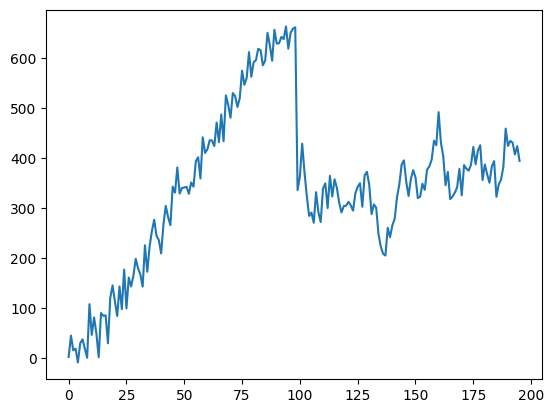

In [100]:
_=plt.plot(data)

# Other

Centering the dataset around the 0 by reducing the mean from the dataset.

[298.66502151 314.02436737]


<Axes: xlabel='x', ylabel='y'>

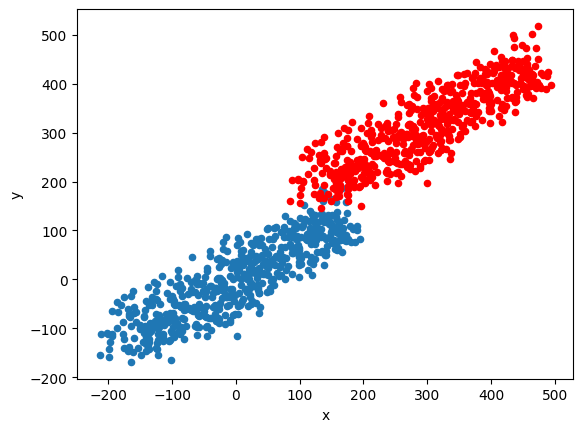

In [178]:
dim_mu = X.mean(0)
print(dim_mu)
centered_X = X-dim_mu

_, ax = plt.subplots()
pd.DataFrame(centered_X, columns=["x", "y"]).plot.scatter(x="x", y="y", ax=ax)
df.plot.scatter(x="x", y="y", ax=ax, color="red")


<Axes: xlabel='x', ylabel='y'>

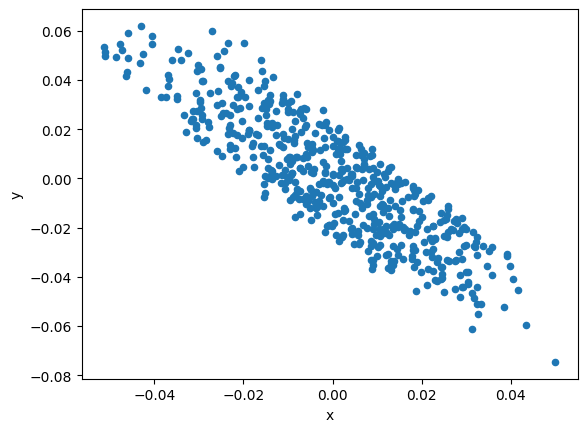

In [204]:
C_ = np.linalg.inv(cov)
decor_X = centered_X @ C_ 

pd.DataFrame(decor_X, columns=["x", "y"]).plot.scatter(x="x", y="y")


In [198]:
C_ = np.linalg.inv(cov)
decor_X = centered_X @ C_ 
result = decor_X @ centered_X.T
result.shape
#pd.DataFrame(result, columns=["x", "y"]).plot.scatter(x="x", y="y")

(557, 557)